Load in all of the imports that are needed throughout the code. When using matplotlib, you set the plt parameters
with the code at the bottom. 

In [1]:
# IMPORTS
from pathlib import Path
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set plt parameters
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,5)

Load all of the "Action" files into "screenplays"  as text files. Then append these files.

In [3]:
# To see a list of all the files
# for p in Path('Documents/engl370/imsdb_raw_nov_2015/Action/').glob('**/*.txt'):
#     print(f"{p.name}\n")

# by subdirectory
screenplays = []
for p in Path('movies/Action/').glob('*.txt'):
    with open(p, mode="r", encoding="utf8", errors='ignore') as f:
        contents = f.read()
        screenplays.append(contents)

Print the amount of movie scripts that there is total.

In [4]:
len(screenplays)

290

Now use the CountVectorizer to lowercase the text, set the minimum document frequency, and the maximum document
frequency. Now "matrix" means that I'm just fitting the model to the data (screenplays). Also set the 
vocabulary now and I will use it later. Now print the features. This shows the total amount of screenplays and
the total amount of words with a min_df of 2 and a max_df of 0.9.

In [5]:
# Vectorize our texts while removing function words
# and words that occur in only one text
vectorizer = CountVectorizer(lowercase = True,
                             min_df = 2,
                             max_df = 0.9)

# fit the model to the data 
matrix = vectorizer.fit_transform(screenplays)

# We'll need these later
vocabulary = vectorizer.get_feature_names_out()

# see how many features we have
matrix.shape

(290, 38708)

Now using the data that I have so far, convert that data into a document term matrix. The document term matrix
has words as columns and documents as rows. 

In [5]:
# Convert to a dataframe
df = pd.DataFrame(matrix.toarray(), 
                  columns = vectorizer.get_feature_names_out())

df.head()

,00,000,003,004,007,009,00am,00pm,01,02,...,zoos,zorro,zulu,zurich,zus,zwei,zwick,zy,zzz,zzzzzz
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0


This is where I will use kmeans, which creates a graph. The %%time cell magic allows us to see how long a cell takes
to run. Please note that it must come before anything else in the cell, even comments!

In [22]:
%%time

# We are going to run this up to 50 possible clusters
wcss = [] 
for i in range(10, 40): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(matrix) 
    wcss.append(kmeans.inertia_)

CPU times: user 29 s, sys: 18.1 s, total: 47 s
Wall time: 9.75 s


This code will actually plot the graph and will run up through 50 possible characters. Set the x (horizontal axis)
to 'Number of clusters' and the y (vertical axis) to 'WCSS'.

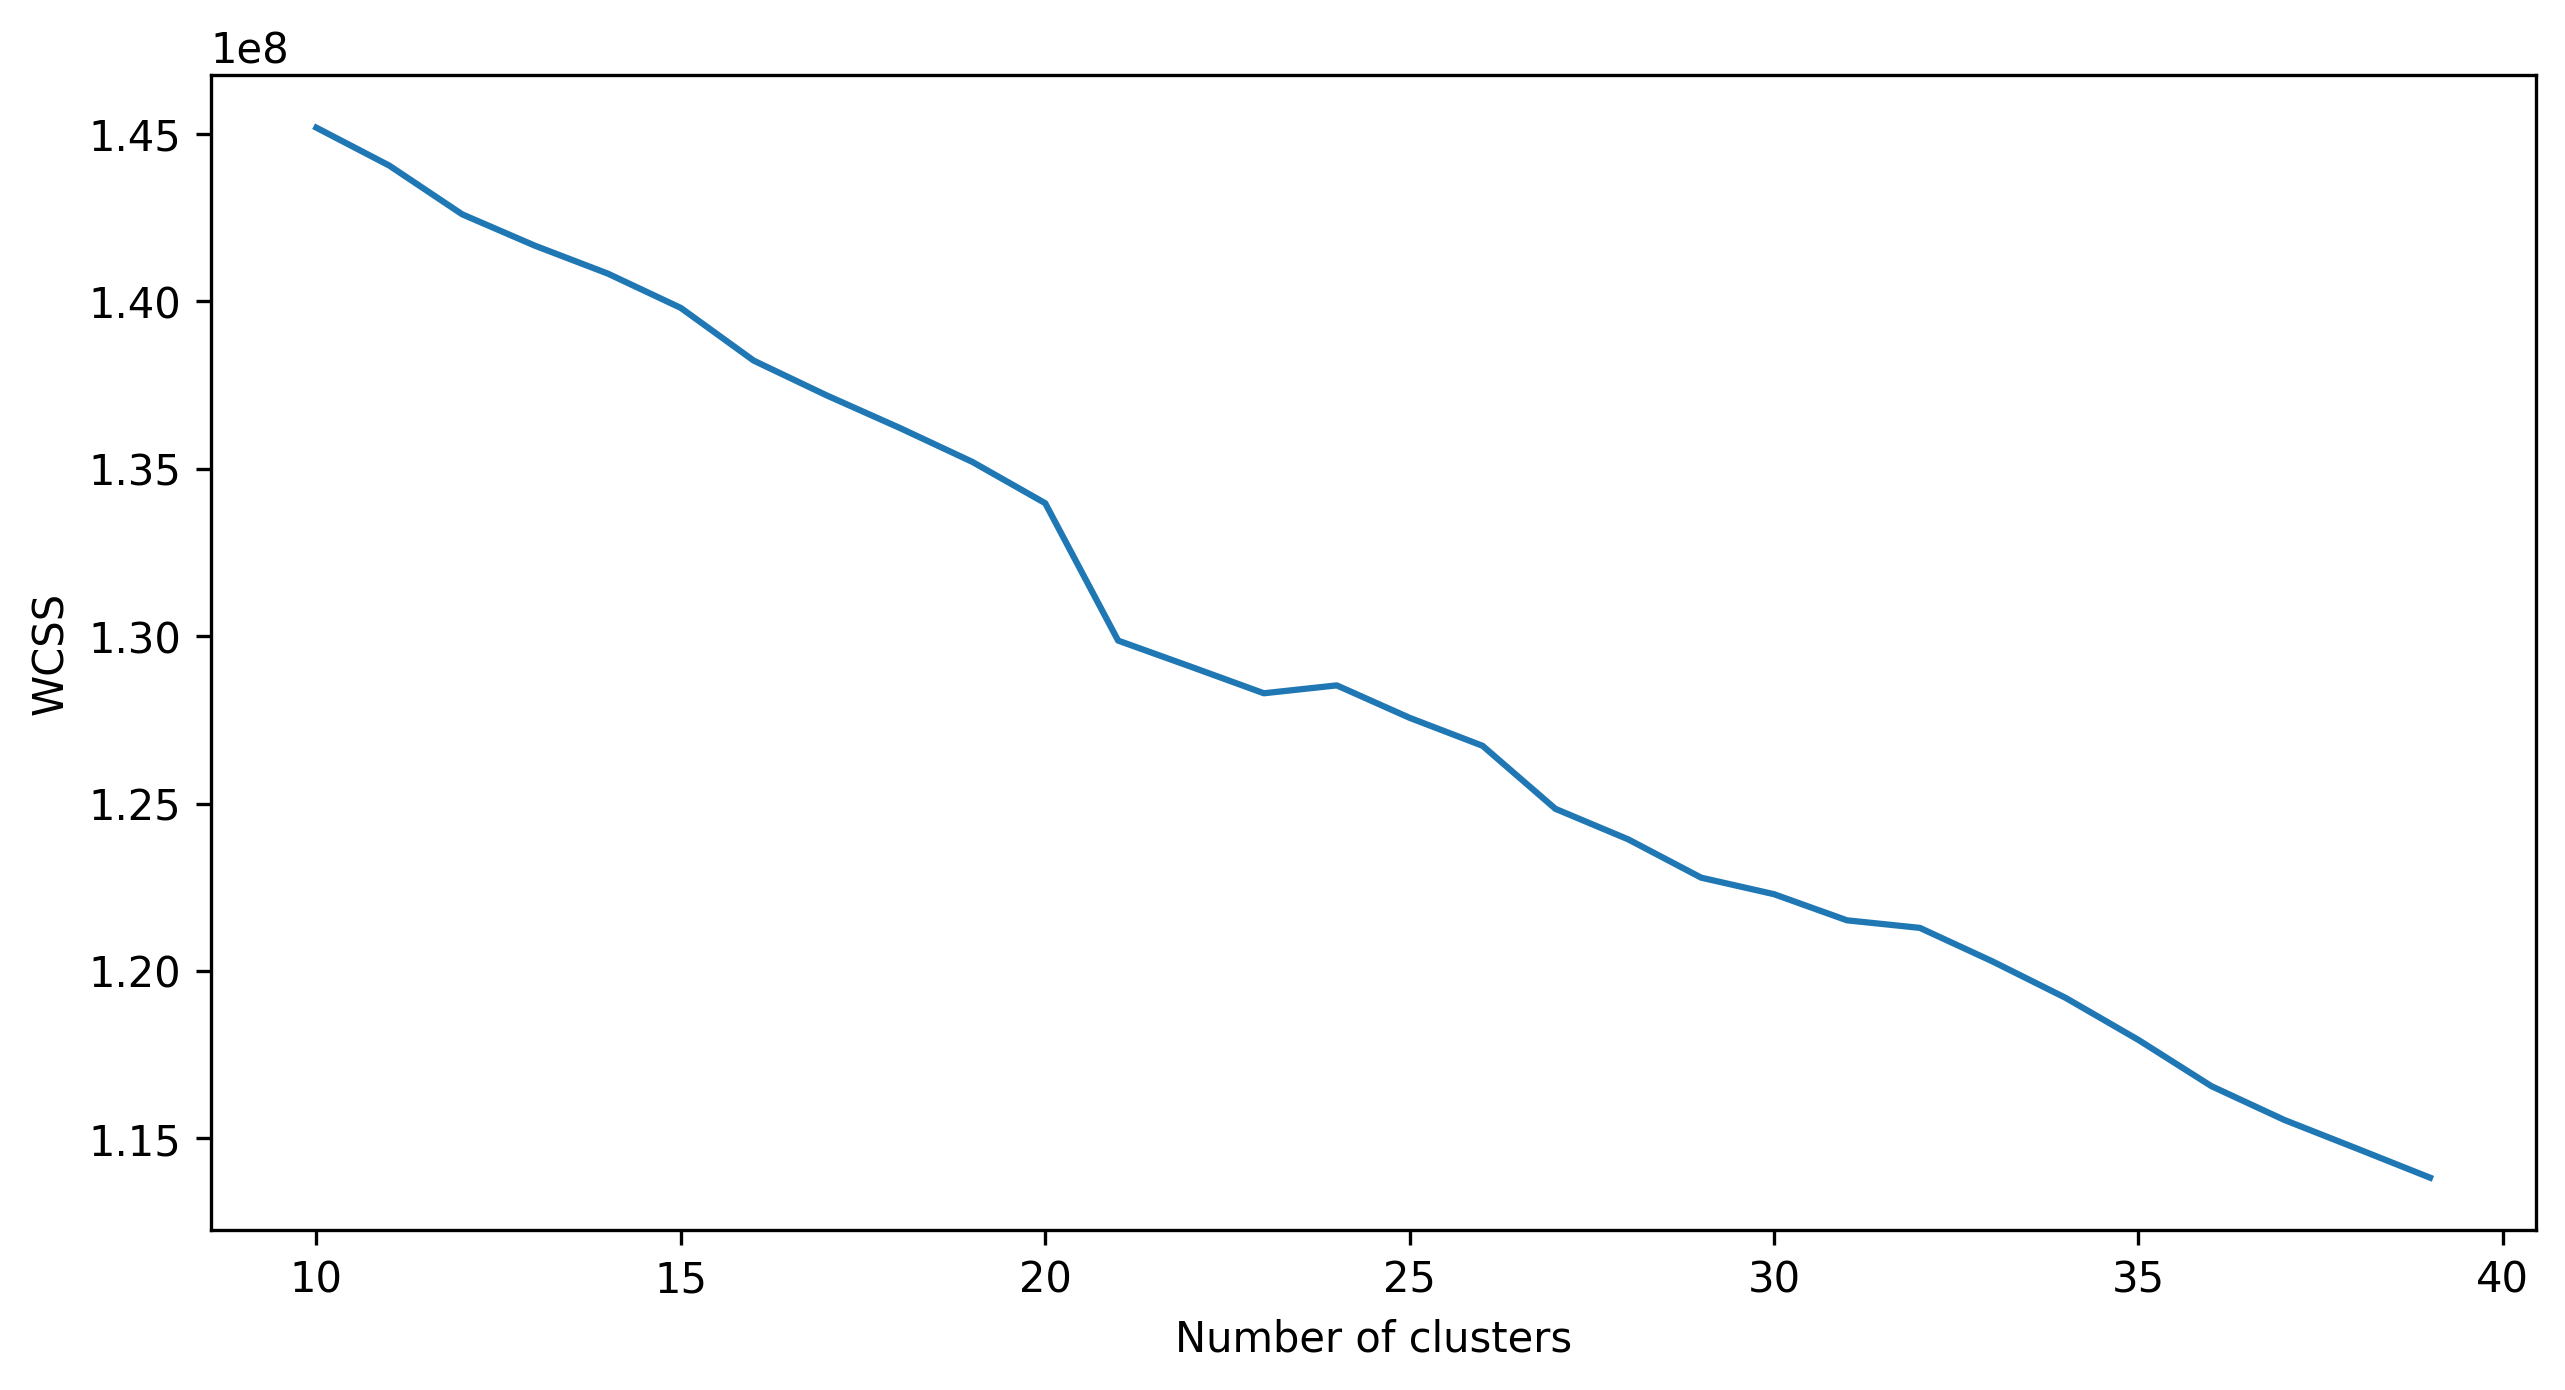

In [23]:
# Let's plot and we'll run this up through 50 possible clusters
plt.plot(range(10, 40), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In this part of the notebook we will explore how to take "standard" sentiments found in the NLTK and use them to tease out
"hidden" sentiments in the gab corpus. This notebook uses the Real Python's Sentiment Analysis: First Steps With Python's NLTK Library as a starting place.

In [6]:
import nltk
import re, numpy as np, random
from nltk.tokenize import word_tokenize
# nltk.download("vader_lexicon")
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chasejones/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Load the gabs:
with open('movies/Action/batman.txt', 'r') as f:
    gabs = f.readlines()

# How many do we have?
print(len(gabs))


11086


In this cell, I am reading the movie spcript of the movie Batman, and then breaking it into different scenes to be able to read the sentiments per scene later on.

In [4]:
# Read the contents of the text file
with open("movies/Action/batman.txt", "r") as file:
    script_text = file.read()

# Split the script into scenes based on scene headings
scenes = []
current_scene = []

for line in script_text.split("\n"):
    # Check if the line is a scene heading (you can adjust this condition based on your script format)
    if line.isupper() and ("INT." in line or "EXT." in line):
        if current_scene:
            scenes.append("\n".join(current_scene))
            current_scene = []
    current_scene.append(line)

# Append the last scene
scenes.append("\n".join(current_scene))

# Now `scenes` contains a list of scenes from the script
# Each element of the list is a string representing a scene
for i, scene in enumerate(scenes):
    print(f"Scene {i+1}:")
    print(scene)
    print("===============================================")

Scene 1:
"Batman", early draft, by Sam Hamm

BATMAN

                        Screenplay by

                          Sam Hamm

              Based on the Character Created by

                          Bob Kane

FIRST DRAFT

                                               October 20, 1986

     FADE IN:

Scene 2:
EXT. CITYSCAPE - NIGHT

     The place is Gotham City. The time, 1987 -- once removed.

     The city of Tomorrow: stark angles, creeping shadows, 

     dense, crowded, airless, a random tangle of steel and 

     concrete, self-generating, almost subterranean in its 

     aspect... as if hell had erupted through the sidewalks and 

     kept on growing. A dangling fat moon shines overhead, ready 

     to burst.

Scene 3:
EXT. CATHEDRAL - NIGHT

     Amid the chrome and glass sits a dark and ornate Gothic 

     anomaly: old City Cathedral, once grand, now abandoned -- 

     long since boarded up and scheduled for demolition.

     On the rooftop far above us, STONE GARGOY

In [7]:
# Initialize the Vader Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# List to store sentiment scores of each scene
sentiment_scores = []

# Iterate over each scene
for scene in scenes:
    # Analyze the sentiment of the scene
    scene_sentiment = sid.polarity_scores(scene)
    sentiment_scores.append(scene_sentiment)

Now that the movie script is broken into 211 scenes. We can now set up a for loop to print the sentiment score for each scene 1-211.

In [8]:
# Example: Print sentiment scores for each scene
for i, score in enumerate(sentiment_scores):
    print(f"Scene {i+1} Sentiment Scores:")
    print(score)
    print("===============================================")

Scene 1 Sentiment Scores:
{'neg': 0.0, 'neu': 0.926, 'pos': 0.074, 'compound': 0.25}
Scene 2 Sentiment Scores:
{'neg': 0.073, 'neu': 0.86, 'pos': 0.067, 'compound': -0.34}
Scene 3 Sentiment Scores:
{'neg': 0.044, 'neu': 0.912, 'pos': 0.044, 'compound': 0.0}
Scene 4 Sentiment Scores:
{'neg': 0.073, 'neu': 0.827, 'pos': 0.1, 'compound': 0.8348}
Scene 5 Sentiment Scores:
{'neg': 0.057, 'neu': 0.875, 'pos': 0.067, 'compound': 0.6047}
Scene 6 Sentiment Scores:
{'neg': 0.155, 'neu': 0.767, 'pos': 0.078, 'compound': -0.9973}
Scene 7 Sentiment Scores:
{'neg': 0.124, 'neu': 0.795, 'pos': 0.081, 'compound': -0.8294}
Scene 8 Sentiment Scores:
{'neg': 0.05, 'neu': 0.798, 'pos': 0.152, 'compound': 0.9858}
Scene 9 Sentiment Scores:
{'neg': 0.082, 'neu': 0.848, 'pos': 0.07, 'compound': -0.5638}
Scene 10 Sentiment Scores:
{'neg': 0.083, 'neu': 0.785, 'pos': 0.132, 'compound': 0.9752}
Scene 11 Sentiment Scores:
{'neg': 0.066, 'neu': 0.805, 'pos': 0.129, 'compound': 0.9898}
Scene 12 Sentiment Scores:
{'

Now, instead of seeing the polarity score for each individual scene, we can put all of the scenes together into one and see the polarity score. This will also show the overall average polarity score. The cell below will just load the data and then the gabs.

In [10]:
# DATA
# Load the gabs:
with open('movies/Action/batman.txt', 'r') as f:
    gabs = f.readlines()

# How many do we have?
print(len(gabs))

11086


This cell removes any links that could possible be found if you have links. (There is now links here, but have for reference incase there is links.

In [14]:
html = re.compile(r'<[^>]*>')
html_free = [ re.sub(html, " ", gab) for gab in gabs ]

This cell is tokenizing the text.This is in a cell by itself because tokenizing takes time, and we only want to do it once.

In [15]:
tokenized = []
for i in html_free:
    tokens = word_tokenize(i)
    tokenized.append(tokens)

The cell below is an example of a list comprehension -- the code inside the square brackets, [] -- embedded inside two functions, first a length and then a print. It's simple, compact, and it allows me to change the number at the end and re-run the cell to "map" out the data a bit in my mind.

In [16]:
print(len([i for i in tokenized if len(i) < 5]))
print(len([i for i in tokenized if len(i) < 10]))

7312
9102


I used numpys histogram here to get a more nuanced "mapping" of the corpus.

In [17]:
lengths = [ len(i) for i in tokenized ]
counts, bins = np.histogram(lengths)
print(counts)
print(bins)

[6455  623  627  285  679  895  472  834  202   14]
[ 0.   1.7  3.4  5.1  6.8  8.5 10.2 11.9 13.6 15.3 17. ]


This sets the posts to 5-10 words.

In [19]:
shorts = [post for post in tokenized if len(post) > 5 and len(post) < 11]

for item in random.sample(shorts, 5):
    print(" ".join(item))

That you , sugar bumps ?
A sunny , landscaped quad surrounded by corporate
INT . FLUEGELHEIM - ROOFTOP TEA ROOM - EVENING
Wait in the next room .
danced with my father on the hotel


This sets the floor to 10, but unfortunately this will eliminate over half the corpus.

In [21]:
# List comprehension for gabs of greater than 10 words
texts = [ post for post in tokenized if len(post) > 10 ]

# Join the gabs back together because NLTK's sentiment expects it?
joins = [ " ".join(text) for text in texts ]

# Let's see a random one of them:
print(random.choice(joins))

Behind DAVE , on the bluescreen : a HUGE STATUE , covered in


Now we can take a look at the polarity score for the entire movie script.

In [22]:
# What it looks like for our corpus:
sample = random.choice(joins)
print(sample)
print(sia.polarity_scores(sample))

night . He does n't know what to do with himself .
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [23]:
# And now just getting the compound:
sample = random.choice(joins)
print(sample)
print(sia.polarity_scores(sample)["compound"])

`` CLOSED '' sign in front of them , and begin uncrating LARGE
0.0
